In [ ]:
# Lab05 Python Data Science with Pandas

In [24]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [ ]:
# Part 1: Basics of Selecting and Slicing Data

In [4]:
# create a pandas dataframe from the location data set
df = pd.read_csv('summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [6]:
len(df)

1759

In [7]:
df.shape 

(1759, 5)

In [ ]:
# Q1: how to get 2 columns from the dataframe (city and country)?

In [98]:
df[['city', 'country']].head(10)

,city,country
0,West Drayton,United Kingdom
1,Lisbon,Portugal
2,Lisbon,Portugal
3,Lisbon,Portugal
4,Lisbon,Portugal
5,Lisbon,Portugal
6,Lisbon,Portugal
7,Lisbon,Portugal
8,Algueirão-Mem Martins,Portugal
9,Sintra,Portugal


In [ ]:
# Q2: how to get the first 5 rows of the "city" column?

In [22]:
df[:5]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [ ]:
# Using .loc[ ]

In [ ]:
# Q3: how to use .loc to select the third row of the dataframe?

In [68]:
df.loc[2:2]

,lat,lon,date,city,country
2,38.71105,-9.139739,05/14/2014 16:40,Lisbon,Portugal


In [ ]:
# Q4: how to use .loc to select the first row in "country" column?

In [67]:
df.loc[0, 'country']

'United Kingdom'

In [ ]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?

In [69]:
df.loc[0:3, ['city', 'date']]

,city,date
0,West Drayton,05/14/2014 09:07
1,Lisbon,05/14/2014 15:11
2,Lisbon,05/14/2014 16:40
3,Lisbon,05/14/2014 18:25


In [ ]:
# Using .iloc[ ]

In [ ]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 
# and the column in position 2

In [71]:
df.iloc[3, 2]

'05/14/2014 18:25'

In [ ]:
# Part 2: How to select rows by some value(s)

In [65]:
# load a reduced set of gps data
df = pd.read_csv('summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [ ]:
# Q9: create a Series of true/false, 
# indicating if each "city" row in the column is equal to "Munich"

In [73]:
df['city'] == 'Munich'

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177     True
Name: city, Length: 178, dtype: bool

In [74]:
df[df['city']=='Munich']

,lat,lon,date,city,country
177,48.35711,11.791346,07/09/2014 13:20,Munich,Germany


In [ ]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# Q10: what cities were visited in spain that were not barcelona? 
# Create a dataframe for it.

In [77]:
not_bcn = df[(df['country']=='Spain') & ~(df['city']=='Barcelona')]
not_bcn

,lat,lon,date,city,country
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain


In [78]:
not_bcn['city'].unique()

array(['El Prat de Llobregat', 'Viladecans', 'Hospitalet de Llobregat'],
      dtype=object)

In [ ]:
# Q11: select rows where either the city is munich, 
# or the country is serbia

In [79]:
df[(df['city']=='Munich') | (df['country']=='Serbia')]

,lat,lon,date,city,country
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [ ]:
# Q12: how many observations are west of the prime meridian?

In [80]:
len(df[df['lon'] < 0])

24

In [ ]:
# Q13: get all rows that contain a city that starts with the letter G

In [81]:
row_mask = df['city'].str.startswith('G')
df[row_mask]

,lat,lon,date,city,country
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


In [ ]:
# Q14: how many unique cities and countries in the dataset? 
# Also can you check missing values for the dataframe

In [85]:
len(df.city.unique())

91

In [86]:
len(df.country.unique())

15

In [93]:
df['lat'].isnull().sum()

0

In [ ]:
# Q15: group by country name and show the city names in each of the country

In [97]:
df.groupby('country')['city'].sum()

country
Albania                                                    BeratGjirokastër
Bosnia and Herzegovina                               SarajevoSarajevoMostar
Croatia                                                 PločeSplitDubrovnik
Czech Republic            Novy BohuminHranicePrerovÚstí nad OrlicíKojice...
Germany                   KümmersbruckWinkelhaidKammersteinEllhofenObers...
Greece                    KakaviaDytiki ElladaDytiki ElladaDytiki Ellada...
Kosovo                                                              Prizren
Macedonia (FYROM)                                                     Ohrid
Montenegro                                                            Kotor
Poland                    ZendekSilesian VoivodeshipDabrowa GorniczaOlku...
Name: city, dtype: object

In [ ]:
# Part 3: How to select based on a date-time values

In [82]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [83]:
len(dt)

1759

In [ ]:
# Q16: is the timestamp index unique? How can you use code to find it?

In [108]:
dt.index.is_unique

False

In [110]:
dt.index.unique()

DatetimeIndex(['2014-05-14 09:07:00', '2014-05-14 09:22:00',
               '2014-05-14 10:51:00', '2014-05-14 11:38:00',
               '2014-05-14 12:23:00', '2014-05-14 12:38:00',
               '2014-05-14 15:11:00', '2014-05-14 15:25:00',
               '2014-05-14 15:41:00', '2014-05-14 15:55:00',
               ...
               '2014-07-09 06:03:00', '2014-07-09 06:18:00',
               '2014-07-09 09:03:00', '2014-07-09 09:18:00',
               '2014-07-09 13:11:00', '2014-07-09 13:13:00',
               '2014-07-09 13:14:00', '2014-07-09 13:17:00',
               '2014-07-09 13:18:00', '2014-07-09 13:20:00'],
              dtype='datetime64[ns]', name='date', length=1749, freq=None)

In [ ]:
# Q17: drop duplicate index

In [101]:
dt.drop_duplicates(inplace=True)
len(dt)

1750

In [84]:
# the .weekday attribute determines which day of the week a date is
# 0 is sunday and 6 is saturday, M-F are 1-5
# Q18: create a weekday and a weekend dataframe

In [104]:
str(list(dt.index.weekday))

'[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# use bitwise OR to create a boolean vector of which rows are a weekend date

In [103]:
weekend_mask = (dt.index.weekday==6) | (dt.index.weekday==0)
weekend_mask

array([False, False, False, ..., False, False, False])

In [105]:
weekends = dt[weekend_mask]
weekdays = dt[~weekend_mask]

In [106]:
weekends

,lat,lon,city,country
date,,,,
2014-05-18 00:28:00,41.145255,-8.610369,Porto,Portugal
2014-05-18 00:58:00,41.145189,-8.610365,Porto,Portugal
2014-05-18 01:28:00,41.145240,-8.610390,Porto,Portugal
2014-05-18 01:58:00,41.145200,-8.610370,Porto,Portugal
2014-05-18 02:27:00,41.145290,-8.610424,Porto,Portugal
...,...,...,...,...
2014-07-07 21:00:00,41.043501,28.985466,Istanbul,Turkey
2014-07-07 21:15:00,41.043456,28.985431,Istanbul,Turkey
2014-07-07 21:30:00,41.043465,28.985441,Istanbul,Turkey


In [107]:
weekdays

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom
2014-05-14 12:23:00,51.480146,-0.441103,Hounslow,United Kingdom
...,...,...,...,...
2014-07-09 13:13:00,48.356013,11.791710,Munich,Germany
2014-07-09 13:14:00,48.356528,11.792183,Munich,Germany
2014-07-09 13:17:00,48.356285,11.791710,Munich,Germany


In [114]:
# Q19: calculate and plot the number of observations each day of the week has

<AxesSubplot:title={'center':'Number of observations, by day of week'}>

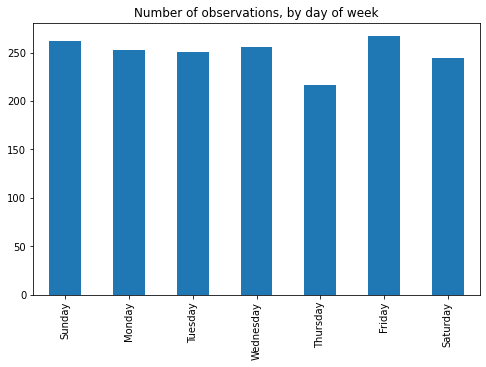

In [115]:
daily_count = dt.groupby(dt.index.weekday).size()
daily_count.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_count.plot(figsize=[8, 5], kind='bar', title='Number of observations, by day of week')